In [1]:
import openmeteo_requests
import matplotlib.pyplot as plt
import requests_cache
import pandas as pd
import numpy as np
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
from retry_requests import retry
import pickleshare

In [100]:
def call_open_meteo_averages(selected_station):
    # Setup the Open-Meteo API client with cache and retry on error
    cache_session = requests_cache.CachedSession(".cache", expire_after=-1)
    retry_strategy = Retry(total=5, backoff_factor=0.2)
    adapter = HTTPAdapter(max_retries=retry_strategy)
    cache_session.mount('http://', adapter)
    cache_session.mount('https://', adapter)
    openmeteo = openmeteo_requests.Client(session=cache_session)

    # Initialize an empty list to store daily data
    daily_data = []

    # Define the start and end dates for the loop
    start_date = pd.Timestamp("1999-12-01")
    end_date = pd.Timestamp("1999-12-31")

    # Iterate through each day of December
    while start_date <= end_date:
        # Define the parameters for the API call
        params = {
            "latitude": selected_station["lat"],
            "longitude": selected_station["lon"],
            "start_date": start_date.strftime("%Y-%m-%d"),
            "end_date": start_date.strftime("%Y-%m-%d"),  # Use the same start and end date for daily data
            "daily": "wind_speed_10m_mean",
            "timezone": "Europe/Berlin",
        }

        # Make the API call
        responses = openmeteo.weather_api("https://archive-api.open-meteo.com/v1/archive", params=params)

        for response in responses:
            # Process daily data. The order of variables needs to be the same as requested.
            daily = response.Daily()
            daily_wind_speed_10m_mean = daily.Variables(0).ValuesAsNumpy()

            # Calculate the average wind speed for the day
            avg_wind_speed = daily_wind_speed_10m_mean.mean()

            # Append the average wind speed for the day to daily_data
            daily_data.append({
                "date": start_date.strftime('%Y-%m-%d'),  # Format date to include year, month, and day
                "wind_speed_10m_mean": avg_wind_speed,  # Use the average wind speed
            })

        # Move to the next day
        start_date += pd.Timedelta(days=1)

    # Create a DataFrame from daily data
    daily_dataframe = pd.DataFrame(daily_data)
    
    # Calculate daily averages
    daily_avg = daily_dataframe.groupby('date').mean()
    return daily_avg

In [101]:
def call_open_meteo_min(selected_station):
    # Setup the Open-Meteo API client with cache and retry on error
    cache_session = requests_cache.CachedSession(".cache", expire_after=-1)
    retry_strategy = Retry(total=5, backoff_factor=0.2)
    adapter = HTTPAdapter(max_retries=retry_strategy)
    cache_session.mount('http://', adapter)
    cache_session.mount('https://', adapter)
    openmeteo = openmeteo_requests.Client(session=cache_session)

    # Initialize an empty list to store daily data
    daily_data = []

    # Define the start and end dates for the loop
    start_date = pd.Timestamp("1999-12-01")
    end_date = pd.Timestamp("1999-12-31")

    # Iterate through each day of December
    while start_date <= end_date:
        # Define the parameters for the API call
        params = {
            "latitude": selected_station["lat"],
            "longitude": selected_station["lon"],
            "start_date": start_date.strftime("%Y-%m-%d"),
            "end_date": start_date.strftime("%Y-%m-%d"),  # Use the same start and end date for daily data
            "daily": "wind_speed_10m_min",
            "timezone": "Europe/Berlin",
        }

        # Make the API call
        responses = openmeteo.weather_api("https://archive-api.open-meteo.com/v1/archive", params=params)

        for response in responses:
            # Process daily data. The order of variables needs to be the same as requested.
            daily = response.Daily()
            daily_wind_speed_10m_min = daily.Variables(0).ValuesAsNumpy()

            # Calculate the average wind speed for the day
            min_wind_speed = daily_wind_speed_10m_min.min()

            # Append the average wind speed for the day to daily_data
            daily_data.append({
                "date": start_date.strftime('%Y-%m-%d'),  # Format date to include year, month, and day
                "wind_speed_10m_min": min_wind_speed,  # Use the average wind speed
            })

        # Move to the next day
        start_date += pd.Timedelta(days=1)

    # Create a DataFrame from daily data
    daily_dataframe = pd.DataFrame(daily_data)
    
    # Calculate daily averages
    daily_min = daily_dataframe.groupby('date').min()
    return daily_min


In [102]:
def call_open_meteo_max(selected_station):
    # Setup the Open-Meteo API client with cache and retry on error
    cache_session = requests_cache.CachedSession(".cache", expire_after=-1)
    retry_strategy = Retry(total=5, backoff_factor=0.2)
    adapter = HTTPAdapter(max_retries=retry_strategy)
    cache_session.mount('http://', adapter)
    cache_session.mount('https://', adapter)
    openmeteo = openmeteo_requests.Client(session=cache_session)

    # Initialize an empty list to store daily data
    daily_data = []

    # Define the start and end dates for the loop
    start_date = pd.Timestamp("1999-12-01")
    end_date = pd.Timestamp("1999-12-31")

    # Iterate through each day of December
    while start_date <= end_date:
        # Define the parameters for the API call
        params = {
            "latitude": selected_station["lat"],
            "longitude": selected_station["lon"],
            "start_date": start_date.strftime("%Y-%m-%d"),
            "end_date": start_date.strftime("%Y-%m-%d"),  # Use the same start and end date for daily data
            "daily": "wind_speed_10m_max",
            "timezone": "Europe/Berlin",
        }

        # Make the API call
        responses = openmeteo.weather_api("https://archive-api.open-meteo.com/v1/archive", params=params)

        for response in responses:
            # Process daily data. The order of variables needs to be the same as requested.
            daily = response.Daily()
            daily_wind_speed_10m_max = daily.Variables(0).ValuesAsNumpy()

            # Calculate the average wind speed for the day
            max_wind_speed = daily_wind_speed_10m_max.max()

            # Append the average wind speed for the day to daily_data
            daily_data.append({
                "date": start_date.strftime('%Y-%m-%d'),  # Format date to include year, month, and day
                "wind_speed_10m_max": max_wind_speed,  # Use the average wind speed
            })

        # Move to the next day
        start_date += pd.Timedelta(days=1)

    # Create a DataFrame from daily data
    daily_dataframe = pd.DataFrame(daily_data)
    
    # Calculate daily averages
    daily_max = daily_dataframe.groupby('date').max()
    return daily_max


In [156]:
def call_open_meteo_temp(selected_station):
    # Setup the Open-Meteo API client with cache and retry on error
    cache_session = requests_cache.CachedSession(".cache", expire_after=-1)
    retry_strategy = Retry(total=5, backoff_factor=0.2)
    adapter = HTTPAdapter(max_retries=retry_strategy)
    cache_session.mount('http://', adapter)
    cache_session.mount('https://', adapter)
    openmeteo = openmeteo_requests.Client(session=cache_session)

    # Initialize an empty list to store daily data
    daily_data = []

    # Define the start and end dates for the loop
    start_date = pd.Timestamp("1999-12-01")
    end_date = pd.Timestamp("1999-12-31")

    # Iterate through each day of December
    while start_date <= end_date:
        # Define the parameters for the API call
        params = {
            "latitude": selected_station["lat"],
            "longitude": selected_station["lon"],
            "start_date": start_date.strftime("%Y-%m-%d"),
            "end_date": start_date.strftime("%Y-%m-%d"),  # Use the same start and end date for daily data
            "daily": "temperature_2m_mean",
            "timezone": "Europe/Berlin",
        }

        # Make the API call
        responses = openmeteo.weather_api("https://archive-api.open-meteo.com/v1/archive", params=params)

        for response in responses:
            # Process daily data. The order of variables needs to be the same as requested.
            daily = response.Daily()
            daily_temp_mean = daily.Variables(0).ValuesAsNumpy()

            # Calculate the average wind speed for the day
            avg_wind_speed = daily_temp_mean.mean()

            # Append the average wind speed for the day to daily_data
            daily_data.append({
                "date": start_date.strftime('%Y-%m-%d'),  # Format date to include year, month, and day
                "temperature_2m_mean": avg_wind_speed,  # Use the average wind speed
            })

        # Move to the next day
        start_date += pd.Timedelta(days=1)

    # Create a DataFrame from daily data
    daily_dataframe = pd.DataFrame(daily_data)
    
    # Calculate daily averages
    daily_avg = daily_dataframe.groupby('date').mean()
    return daily_avg

In [157]:
Deutschland_Berlin={'lat': 52.5200, 'lon': 13.4050}
Deutschland_Berlin_wmean = call_open_meteo_averages(Deutschland_Berlin)
%store Deutschland_Berlin_wmean
Deutschland_Berlin_wmin = call_open_meteo_min(Deutschland_Berlin)
%store Deutschland_Berlin_wmin
Deutschland_Berlin_wmax = call_open_meteo_max(Deutschland_Berlin)
%store Deutschland_Berlin_wmax
Deutschland_Berlin_tmean = call_open_meteo_temp(Deutschland_Berlin)
%store Deutschland_Berlin_tmean

Stored 'Deutschland_Berlin_wmean' (DataFrame)
Stored 'Deutschland_Berlin_wmin' (DataFrame)
Stored 'Deutschland_Berlin_wmax' (DataFrame)
Stored 'Deutschland_Berlin_tmean' (DataFrame)


In [170]:
def plot(Wind_min, Wind_mean,Wind_max,temp_mean):
    data = pd.concat([Wind_min,Wind_max, Wind_mean], axis=1)
    data.columns = ['Wind Minimum','Wind Maximum', 'Wind Mittelwert']
    
    # Plot
    ax = data.plot(kind = 'bar', figsize=(100, 15))
    # Umbenennen der Spalte mit dem richtigen Label
    temp_mean.rename(columns={'temperature_2m_mean': 'Temperatur Mittelwert'}, inplace=True)

    # Hinzufügen der Linie für die Temperaturdaten
    temp_mean.plot(ax=ax, color='red', marker='', linewidth=2, label='Temperatur Mittelwert')
    
    # Beschriftungen und Anpassungen
    plt.xlabel('Datum')
    plt.ylabel('wind in m/s und Temp in °C')
    plt.title('Vergleich der Wetterdaten')
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

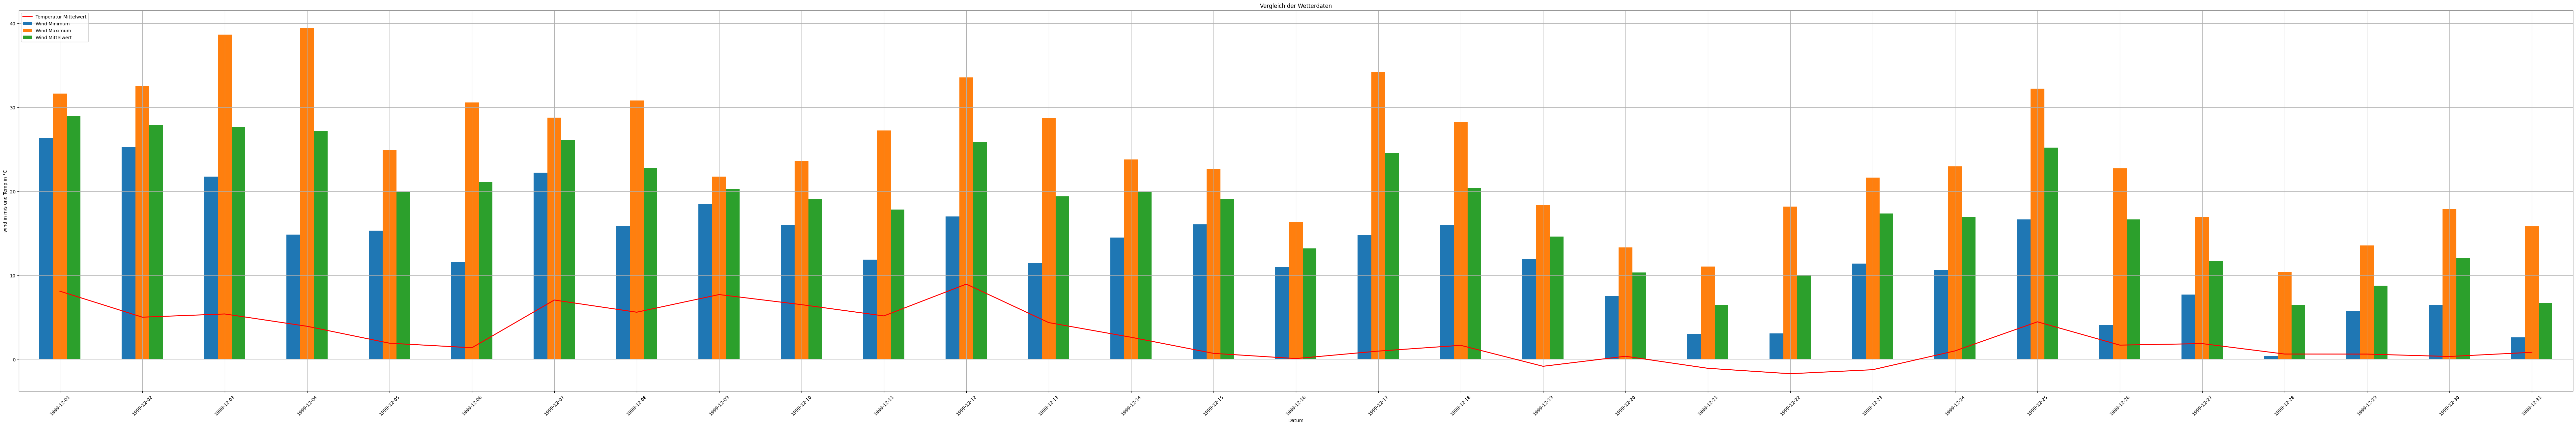

In [171]:
plot(Deutschland_Berlin_wmin, Deutschland_Berlin_wmean, Deutschland_Berlin_wmax, Deutschland_Berlin_tmean)